In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport

data = pd.read_csv('../input/malnutrition-across-the-globe/malnutrition-estimates.csv')
data_by_country = pd.read_csv('../input/malnutrition-across-the-globe/country-wise-average.csv')
data.drop(['Unnamed: 0','ISO code','Survey Year','Source','Report Author','Notes','Short Source'], axis=1, inplace=True)

def income_map(val):
    mapper = {0:'Low Income', 1:'Lower Middle Income', 2:'Upper Middle Income',3:'High Income'}
    return mapper[val]
def lldc_map(val):
    mapper = {0:'Others', 2:'SIDS', 1:'LLDC'}
    return mapper[val]

data['Income Classification'] = data['Income Classification'].apply(income_map)
data['LLDC or SID2'] = data['LLDC or SID2'].apply(lldc_map)

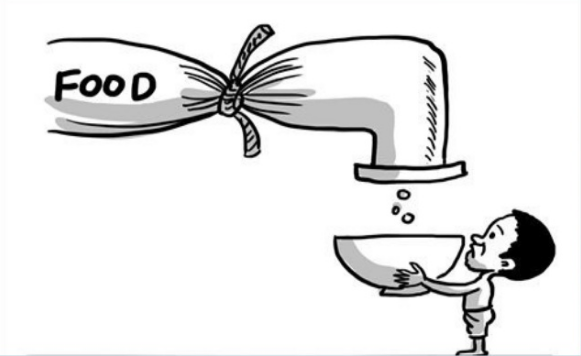

In [2]:
from IPython.display import Image
Image("../input/nifty50/Capture.PNG")
#source: https://www.slideshare.net/souravgoswami11/epidemiology-of-childhood-malnutrition-in-india-and-strategies-of-control

Malnutrition is a condition that results from eating a diet in which one or more nutrients are either not enough or are too much such that the diet causes health problems. It may involve calories, protein, carbohydrates, fat, vitamins or minerals. Not enough nutrients is called undernutrition or undernourishment while too much is called overnutrition. 

People also often get infections and are frequently cold. The symptoms of micronutrient deficiencies depend on the micronutrient that is lacking. [Source](https://en.wikipedia.org/wiki/Malnutrition).

# Report of Malnutrition Data

In [3]:
report = ProfileReport(data)

In [4]:
report

# Which country shows highest Underweight percentage? ---> Bangladesh

In [5]:
country = data.loc[:,['Country','Underweight']]
country['percunder'] = country.groupby('Country')['Underweight'].transform('max')
country = country.drop('Underweight',axis=1).drop_duplicates().sort_values('percunder', ascending=False).head()

fig = px.pie(country, names='Country', values='percunder', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

# Which country shows highest Overweight percentage? ---> Albania

In [6]:
country = data.loc[:,['Country','Overweight']]
country['percunder'] = country.groupby('Country')['Overweight'].transform('max')
country = country.drop('Overweight',axis=1).drop_duplicates().sort_values('percunder', ascending=False).head()

fig = px.pie(country, names='Country', values='percunder', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

# Distribution of Underweight percentages

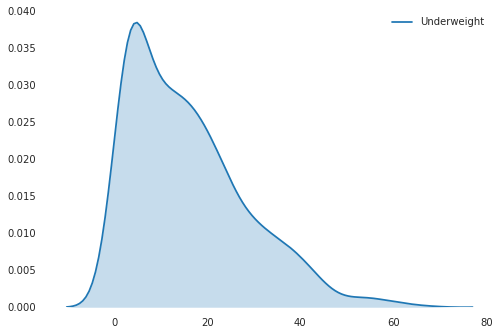

In [7]:
sns.kdeplot(data['Underweight'], shade=True)
plt.show()

# Which income class have highest underweight percentage? ---> Lower Middle Income

In [8]:
df = data.loc[:,['Income Classification','Underweight']]
df['maxunder'] = df.groupby('Income Classification')['Underweight'].transform('max')
df = df.drop('Underweight', axis=1).drop_duplicates()

fig = px.pie(df, names='Income Classification', values='maxunder', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label", showlegend=False)
fig.show()

# Underweight percentage in Least Developed Country vs Developed Country

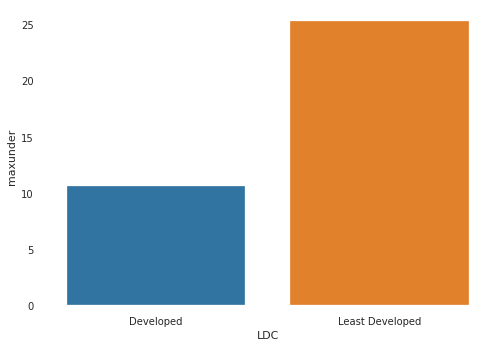

In [9]:
df = data.loc[:,['LDC','Underweight']]
df['maxunder'] = df.groupby('LDC')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()

fig = sns.barplot(data=df, x='LDC', y='maxunder')
fig.set(xticklabels = ['Developed', 'Least Developed'])
plt.show()

# Low Income Food Deficient Countries Underweight percentages

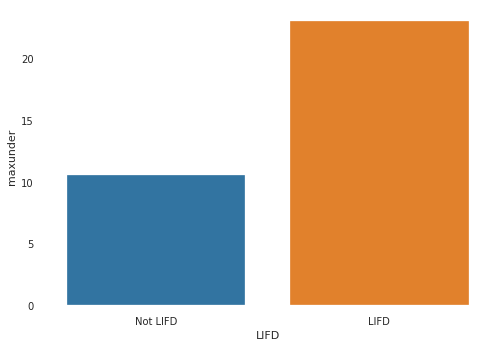

In [10]:
df = data.loc[:,['LIFD','Underweight']]
df['maxunder'] = df.groupby('LIFD')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()

fig = sns.barplot(data=df, x='LIFD', y='maxunder')
fig.set(xticklabels = ['Not LIFD', 'LIFD'])
plt.show()

## Landlocked Developing Countries vs Small Island Developing states vs Others ---> Others

In [11]:
df = data.loc[:,['LLDC or SID2','Underweight']]
df['maxunder'] = df.groupby('LLDC or SID2')['Underweight'].transform('max')
df = df.drop('Underweight', axis=1).drop_duplicates()

fig = px.pie(df, names='LLDC or SID2', values='maxunder', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label", showlegend=False)
fig.show()

# Severe Wasting
### This is the % of children aged 0–59 months who are below minus three standard deviations from median weight-for-height

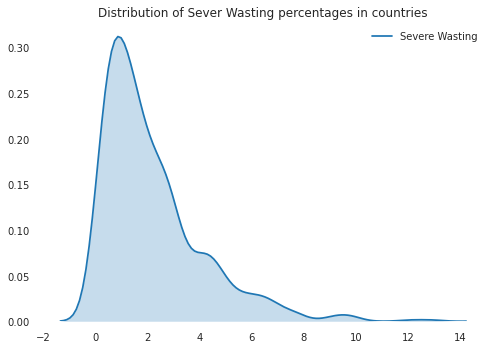

In [12]:
sns.kdeplot(data=data['Severe Wasting'], shade=True)
plt.title('Distribution of Sever Wasting percentages in countries')
plt.show()

We can notice from the distribution plot that the percentage values o as high as 12% in some countries.

# Relation of severe wasting to sample size

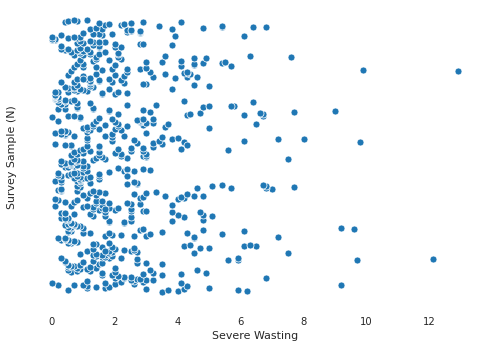

In [13]:
fig = sns.scatterplot(data=data, x='Severe Wasting', y='Survey Sample (N)')
fig.set(yticklabels=[])
plt.show()

From the scatter plot it can be noticed that high severe wasting percentages is mostly found for low survey sample sizes.

# Severe Wasting - Wasting - Overweight - Underweight

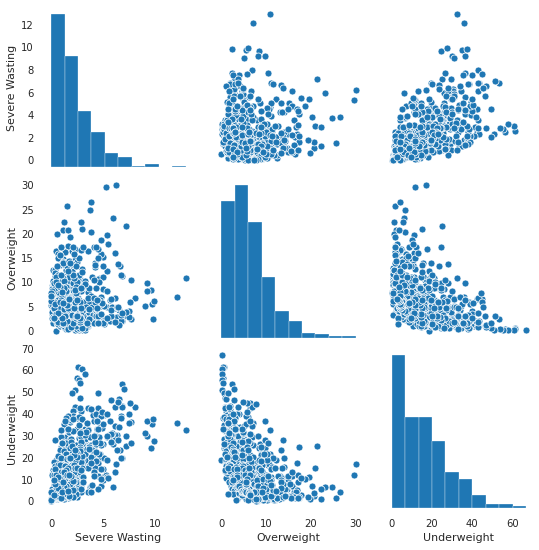

In [14]:
sns.pairplot(data[['Severe Wasting','Overweight','Underweight']])
plt.show()

# U5 Population
### Population of that country under the age of 5

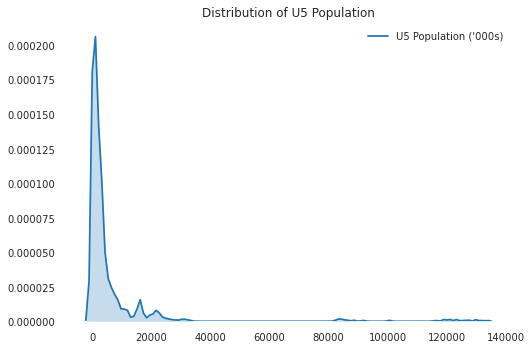

In [15]:
sns.kdeplot(data=data['U5 Population (\'000s)'], shade=True)
plt.title('Distribution of U5 Population')
plt.show()

# Relation of Underweight % to U5 population

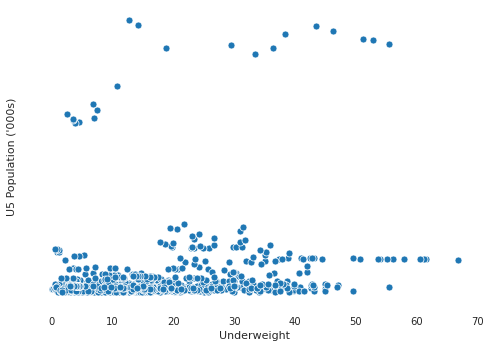

In [16]:
fig = sns.scatterplot(data=data, x='Underweight', y='U5 Population (\'000s)')
fig.set(yticklabels=[])
plt.show()

It can be clearly noticed that for highest populations the underweight percentage is also quite high.

# Which country shows highest underweight count? ---> India

In [17]:
df = data.loc[:,['Country','Underweight','U5 Population (\'000s)']]
df['underweight_count'] = (df['U5 Population (\'000s)'] * df['Underweight'])/100
df.drop(['Underweight','U5 Population (\'000s)'], axis=1, inplace=True)
df['undermean'] = df.groupby('Country')['underweight_count'].transform('mean')
df = df.drop('underweight_count', axis=1).drop_duplicates().sort_values('undermean', ascending=False).head()

fig = px.pie(df, names='Country', values='undermean', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

The reason behind this exceptional percentage may be due to the population count or any other factor as well.